# Two-qubit randomized benchmarking data

This notebook contains an overview of loading and analyzing experiments used to measure the two-qubit error rates that were measured during the random circuit sampling experiments.

## Data format

Each data file is saved as a dictionary in a json file with five keys:
- `survival`: nested dictionary of correct output counts for different qubits, lengths, and repetitions
- `leakage_postselect`: (only newer RB tests) rate that leakage gadget identifies a leaked state at end of circuit
- `expected_output`: nested dictionary of expected output string for different qubits, lengths, and repetitions
- `sequence_info`: dictionary with keys=length, values=number of repetitions
- `qasm`: dictionary with keys=`'length, rep index'` and value=qasm run on machine
- `raw data`: dictionary with same keys as above with list outputs strings from each shot of the experiment
- `shots`: number of shots for each circuit

Available datasets:
- `'data/2q_cliff_rb_H2-1-N56_2024-05-01_1656.json'`
- `'data/2q_cliff_rb_H2-1-N56_2024-05-02_0947.json'`
- `'data/2q_cliff_rb_H2-1-N56_2024-05-03_1114.json'`
- `'data/2q_cliff_rb_H2-1-N56_2024-05-07_0830.json'`
- `'data/2q_cliff_rb_H2-1-N56_2024-05-07_1559.json'`
- `'data/2q_cliff_rb_H2-1-N56_2024-05-08_1009.json'`
- `'data/2q_cliff_rb_H2-1-N56_2024-05-09_0814.json'`

## Loading combined dataset

In [4]:
from combined_analysis import combined_report

combined_report()

,2Q gate infid.,2Q gate uncertainty
2024-05-01_1656,1.649E-03,1.508E-04
2024-05-02_0947,1.649E-03,1.249E-04
2024-05-03_1114,1.514E-03,1.301E-04
2024-05-07_0830,1.593E-03,1.286E-04
2024-05-07_1559,1.352E-03,1.243E-04
2024-05-08_1009,1.624E-03,1.381E-04
2024-05-09_0814,1.599E-03,1.545E-04
combined,1.568E-03,5.084E-05


## Loading individual data files

Load raw data files

In [5]:
from rb_analysis_functions import load_data

file_name = '2q_cliff_rb_H2-1-N56_2024-05-01_1656.json'
data = load_data(file_name)

Each data file is analyzed with `rb_analysis()` function to output the estimated fidelity of the gates.

In [6]:
from rb_analysis_functions import rb_analysis

fid_info, boot_info = rb_analysis(file_name)

### Report Table

The table contains RB intercept and avg fidelity estimations with uncertainty from semi-parametric bootstrap resampling and basic bootstrap one-sigma confidence intervals. 

In [7]:
from rb_reporting_functions import report

report(fid_info, boot_info)

,Avg. infidelity,Avg. infidelity uncertainty,RB Intercept,RB Intercept uncertainty
DG01,1.478E-03,3.047E-04,3.459E-03,9.535E-03
DG02,2.205E-03,2.293E-04,-7.950E-03,9.743E-03
DG03,1.452E-03,2.419E-04,9.054E-03,1.063E-02
DG04,1.502E-03,2.459E-04,7.570E-03,1.091E-02
Mean,1.659E-03,1.285E-04,3.033E-03,5.111E-03


### Plotting results

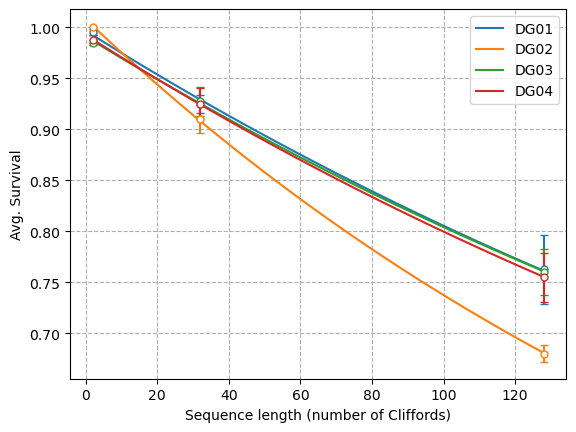

In [8]:
from rb_reporting_functions import errorbar_plot

errorbar_plot(fid_info, data)

<div align="center"> &copy; 2024 by Quantinuum. All Rights Reserved. </div>